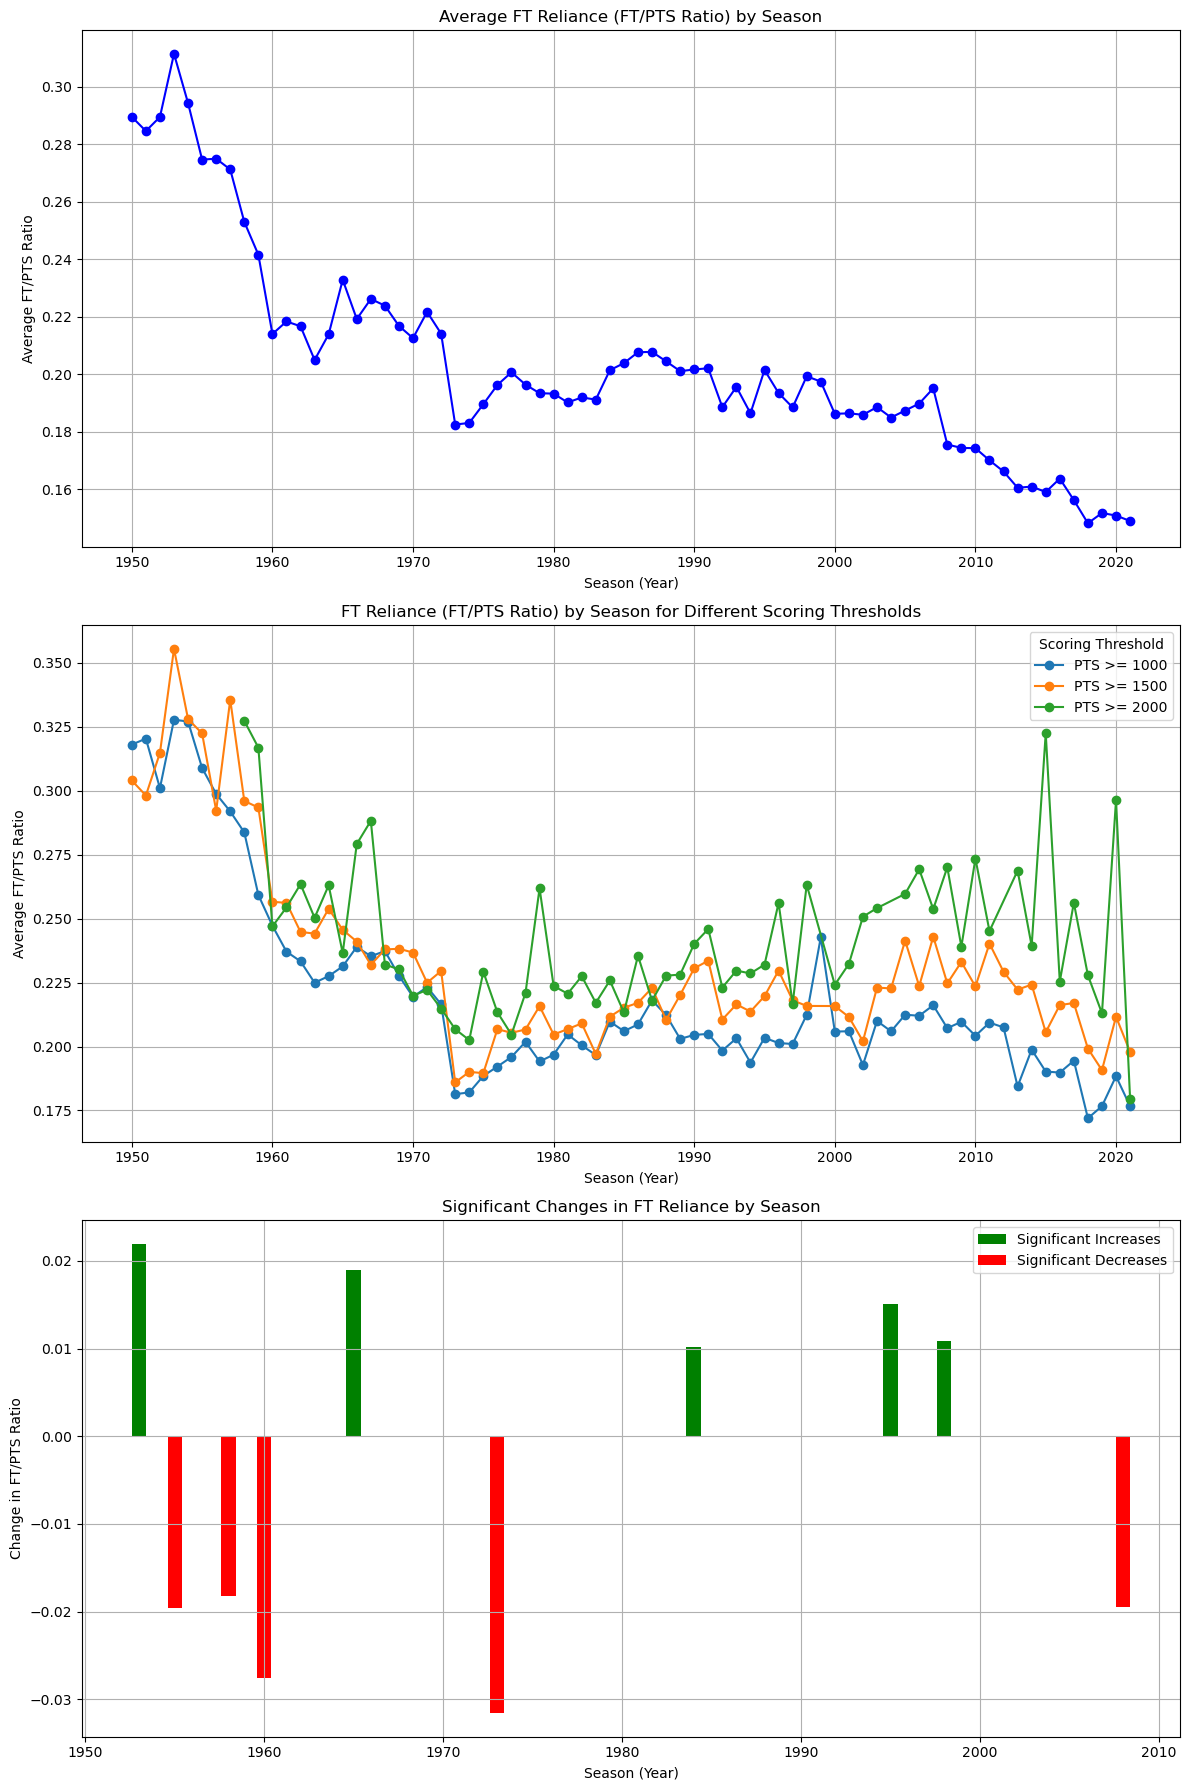

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset 
nba_data = pd.read_csv('NBA_Stats_1950_2021_raw.csv')

# Step 1: Clean the data
nba_data['MIN'] = nba_data.groupby('Year')['MIN'].transform(lambda x: x.fillna(x.median()))
nba_data.loc[nba_data['Year'] < 1979, ['3PM', '3PA']] = 0
nba_data[['3PM', '3PA', 'REB', 'ORB', 'DRB', 'STL', 'BLK', 'TOV']] = nba_data[['3PM', '3PA', 'REB', 'ORB', 'DRB', 'STL', 'BLK', 'TOV']].fillna(0)
nba_data['FT/PTS'] = nba_data['FTM'] / nba_data['PTS']
nba_data = nba_data[nba_data['FT/PTS'] < 1.0]
nba_data.drop_duplicates(subset=['Player', 'Team', 'Year'], keep='first', inplace=True)

# Calculate FT reliance by season
ft_reliance_by_season = nba_data.groupby('Year')['FT/PTS'].mean()

# Define scoring thresholds and calculate FT reliance trends
scoring_thresholds = [1000, 1500, 2000]
ft_reliance_by_threshold = {}
for threshold in scoring_thresholds:
    filtered_data = nba_data[nba_data['PTS'] >= threshold]
    ft_reliance_by_threshold[threshold] = filtered_data.groupby('Year')['FT/PTS'].mean()

# Calculate significant year-over-year changes in FT reliance
ft_reliance_diff = ft_reliance_by_season.diff()
significant_increase_seasons = ft_reliance_diff.nlargest(5)
significant_decrease_seasons = ft_reliance_diff.nsmallest(5)

# Plot all analyses in a single figure
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Average FT/PTS ratio by season (overall)
ax[0].plot(ft_reliance_by_season.index, ft_reliance_by_season.values, marker='o', color='b')
ax[0].set_title("Average FT Reliance (FT/PTS Ratio) by Season")
ax[0].set_xlabel("Season (Year)")
ax[0].set_ylabel("Average FT/PTS Ratio")
ax[0].grid(True)

# Plot 2: FT/PTS ratio trends by season for different scoring thresholds
for threshold, trend in ft_reliance_by_threshold.items():
    ax[1].plot(trend.index, trend.values, marker='o', label=f'PTS >= {threshold}')
ax[1].set_title("FT Reliance (FT/PTS Ratio) by Season for Different Scoring Thresholds")
ax[1].set_xlabel("Season (Year)")
ax[1].set_ylabel("Average FT/PTS Ratio")
ax[1].legend(title="Scoring Threshold")
ax[1].grid(True)

# Plot 3: Significant increases and decreases in FT/PTS ratio by season
ax[2].bar(significant_increase_seasons.index, significant_increase_seasons.values, color='g', label="Significant Increases")
ax[2].bar(significant_decrease_seasons.index, significant_decrease_seasons.values, color='r', label="Significant Decreases")
ax[2].set_title("Significant Changes in FT Reliance by Season")
ax[2].set_xlabel("Season (Year)")
ax[2].set_ylabel("Change in FT/PTS Ratio")
ax[2].legend()
ax[2].grid(True)

# Display all plots
plt.tight_layout()
plt.show()
